# Datos de diabetes


In [23]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # gráficos 
import seaborn as sns # mapa de calor

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sergiomath/dataScience/main/Proyectos/Diabetes/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Get familier with dataset structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df[df['BloodPressure'] == 0].shape

(35, 9)

In [ ]:
df[df['BMI'] == 0].shape

#df[df['BloodPressure'] == 0].shape

(11, 9)

In [ ]:
df[df['Glucose'] == 0].shape

(5, 9)

In [ ]:
df[df['Insulin'] == 0].shape

(374, 9)

In [ ]:
df[df['SkinThickness'] == 0].shape

(374, 9)

In [ ]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


## Correción de datos faltantes

In [5]:
#corrigiendo bloodpressure
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
#corrigiendo BMI
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
#corrigiendo INsulin
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
#corrigiendo skinthickness
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
#corrigiendo glucose
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Trasnformación de los datos

Como las unidades entre las variables son diferentes y estás pueden afectar 
el peso que le de el modelo a determinada variable se decide estandarizar para
tener todas las variables en una escala alrededor de 0 sin afectar la información de cada variable.

In [8]:
from sklearn import preprocessing

In [9]:
# datos estandarizados para crear el modelo
Est_df = preprocessing.StandardScaler().fit_transform(df)
Data = pd.DataFrame(Est_df)
Data.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Data['Outcome'] = df['Outcome']
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136,0
764,-0.547919,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023,0
765,0.342981,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760,0
766,-0.844885,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732,1


## Separación de la base de datos

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
Entrena, prueba, Entrena_clase, prueba_clase = train_test_split(
    Data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
        "BMI","DiabetesPedigreeFunction","Age"]],
    Data[["Outcome"]],
    test_size= 0.25,
    random_state= 4
)

In [12]:
Entrena

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
170,0.639947,-0.646195,0.795225,-0.469981,-0.608201,-0.240276,-0.881501,0.234767
166,-0.250952,0.866045,-0.528319,-0.253132,-0.608201,0.007144,-0.651972,-0.956462
25,1.827813,0.109925,-0.197433,-0.144707,0.192907,-0.196614,-0.805998,0.660206
13,-0.844885,2.213910,-1.024647,-0.469981,7.123206,-0.342155,-0.223115,2.191785
55,-0.844885,-1.599563,-1.851862,-1.879500,-0.608201,-1.375501,-0.676133,-1.041549
...,...,...,...,...,...,...,...,...
360,0.342981,2.213910,-0.693761,0.614265,2.183828,-0.182060,0.335607,-0.360847
709,-0.547919,-0.942068,-0.693761,0.505840,0.619533,0.807623,0.610438,-0.871374
439,0.639947,-0.481821,1.291553,-0.469981,-0.608201,0.632973,0.770504,-0.190672
174,-0.547919,-1.533814,-0.693761,-0.361556,-0.375927,-0.400372,-0.307679,-0.020496


In [13]:
prueba


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
390,-0.844885,-0.711944,-0.528319,0.180566,0.960834,-0.065626,-0.084190,0.745293
146,1.530847,-2.125559,0.629782,1.047963,-0.608201,0.050807,-1.135191,0.660206
136,-1.141852,-0.711944,-0.197433,-0.144707,-0.423330,-0.240276,0.377888,-1.041549
420,-0.844885,-0.087324,1.291553,1.481661,0.714339,1.870077,0.106078,-0.616111
328,-0.547919,-0.646195,1.126110,0.939538,0.240310,1.899185,-1.041567,-0.871374
...,...,...,...,...,...,...,...,...
18,-0.844885,-0.613320,-3.506291,1.156387,-0.110471,1.578993,-0.872441,-0.020496
633,-0.844885,0.208549,0.795225,-1.120528,0.837586,-0.720563,-1.077809,-0.956462
214,1.530847,-0.317447,0.795225,0.505840,0.761742,0.254565,-0.639892,0.234767
203,-0.547919,-0.744819,-0.197433,-1.228953,-0.480213,-1.753909,-0.715395,-0.531023


In [14]:
Entrena_clase

,Outcome
170,1
166,0
25,1
13,1
55,0
...,...
360,1
709,1
439,0
174,0


In [15]:
prueba_clase

,Outcome
390,0
146,0
136,0
420,0
328,1
...,...
18,0
633,0
214,1
203,0


# Modelo KNN

primero realizaremos una supervisión a los datos para conocer las caracteristicas de nuestros datos y tomar decisiones para aplicar al  modelo de KNN

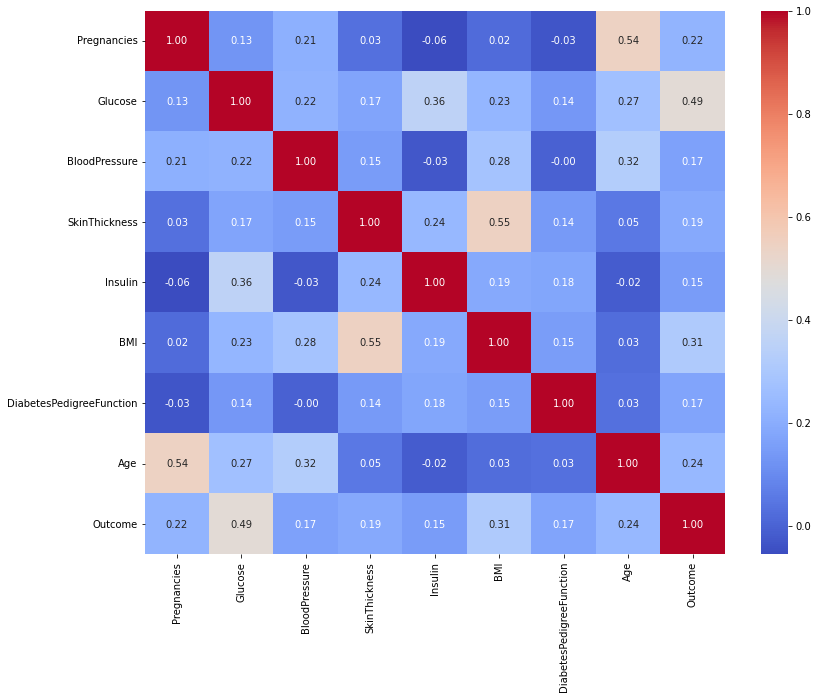

In [31]:
##### matriz de correlaciones datos originales
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [34]:
### matriz de covarianza de los datos originales
df.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.150057,8.503285,1.012805,-19.808828,0.499164,-0.037426,21.570620,0.356618
Glucose,13.150057,926.489244,80.612899,48.357684,1148.770168,48.425998,1.384952,95.543147,7.154009
BloodPressure,8.503285,80.612899,146.328741,16.501451,-36.670464,23.381459,-0.009532,46.222239,0.956140
SkinThickness,1.012805,48.357684,16.501451,85.174705,232.019358,34.705627,0.437201,5.916679,0.832226
Insulin,-19.808828,1148.770168,-36.670464,232.019358,11140.295536,137.169483,6.225853,-19.131269,7.473497
BMI,0.499164,48.425998,23.381459,34.705627,137.169483,47.270664,0.349688,2.081592,1.023932
DiabetesPedigreeFunction,-0.037426,1.384952,-0.009532,0.437201,6.225853,0.349688,0.109779,0.130772,0.027472
Age,21.570620,95.543147,46.222239,5.916679,-19.131269,2.081592,0.130772,138.303046,1.336953
Outcome,0.356618,7.154009,0.956140,0.832226,7.473497,1.023932,0.027472,1.336953,0.227483


## PCA para toma de decisiones

In [73]:
##### covarianza sin outcome
dfPCA =pd.DataFrame(df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
        "BMI","DiabetesPedigreeFunction","Age"]])
dfPCA.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,11.354056,13.150057,8.503285,1.012805,-19.808828,0.499164,-0.037426,21.570620
Glucose,13.150057,926.489244,80.612899,48.357684,1148.770168,48.425998,1.384952,95.543147
BloodPressure,8.503285,80.612899,146.328741,16.501451,-36.670464,23.381459,-0.009532,46.222239
SkinThickness,1.012805,48.357684,16.501451,85.174705,232.019358,34.705627,0.437201,5.916679
Insulin,-19.808828,1148.770168,-36.670464,232.019358,11140.295536,137.169483,6.225853,-19.131269
BMI,0.499164,48.425998,23.381459,34.705627,137.169483,47.270664,0.349688,2.081592
DiabetesPedigreeFunction,-0.037426,1.384952,-0.009532,0.437201,6.225853,0.349688,0.109779,0.130772
Age,21.570620,95.543147,46.222239,5.916679,-19.131269,2.081592,0.130772,138.303046


In [35]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# creación del modelo clasificador
clasificador = KNeighborsClassifier(n_neighbors=7)
clasificador.fit(Entrena,Entrena_clase)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [36]:
from sklearn.model_selection import cross_val_score

In [ ]:
 # accuarency
 print(cross_val_score(clasificador,
                       Entrena,Entrena_clase,cv=5).mean())

0.7500749625187406


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

## intento ponderando por la distancia

In [40]:
# creación del modelo clasificador
clasificador2 = KNeighborsClassifier(n_neighbors=7,weights="distance")
clasificador2.fit(Entrena,Entrena_clase)
# accuarency
print(cross_val_score(clasificador2,
                       Entrena,Entrena_clase,cv=5).mean())

0.7552773613193404


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam